# The Battle of Neighborhoods: A Coursera Capstone Project
## Toronto Neighborhood Evaluations Using Scarborough as a Template

## Python Packages Required

In [1]:
import json 
import xml
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from geopy.geocoders import Nominatim

from pandas.io.json import json_normalize 

import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans

import folium # map rendering library
import warnings
warnings.filterwarnings("ignore")
import requests

## Importing Data

#### This dataset was created, edited, and cleaned in the previous notebook entitled "Segmenting and Clustering Neighborhoods in Toronto," which can be found on [my GitHub page](https://github.com/hightowere/capstone/blob/master/Segmenting%20and%20Clustering%20Neighborhoods%20in%20Toronto.ipynb).

In [2]:
data_filepath=r'C:\Users\Emily\Desktop\data.csv'
df=pd.read_csv(data_filepath)
print(df.shape)
df.head(5)

(17, 4)


,Postcode,Neighborhood,Latitude,Longitude
0,M1B,"Rouge, Malvern",43.811525,-79.195517
1,M1C,"Highland Creek, Rouge Hill, Port Union",43.785665,-79.158725
2,M1E,"Guildwood, Morningside, West Hill",43.765815,-79.175193
3,M1G,Woburn,43.768369,-79.217590
4,M1H,Cedarbrae,43.769688,-79.239440


In [3]:
address = 'Scarborough,Toronto'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude_x = location.latitude
longitude_y = location.longitude
print('The geograpical coordinate of Scarborough, Toronto are {}, {}.'.format(latitude_x, longitude_y))

The geograpical coordinate of Scarborough, Toronto are 43.773077, -79.257774.


## Mapping Scarborough

In [4]:
# creating a map of Toronto using latitude and longitude values
map_Scarborough = folium.Map(location=[latitude_x, longitude_y], zoom_start=10)

# addding markers to map
for lat, lng, nei in zip(df['Latitude'], df['Longitude'], df['Neighborhood']):
    label = '{}'.format(nei)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Scarborough)  
    
map_Scarborough

In [5]:
address = 'Scarborough,Toronto'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude_n1 = location.latitude
longitude_n1 = location.longitude
print('The geograpical coordinate of neighborhood_1 are {}, {}.'.format(latitude_x, longitude_y))

The geograpical coordinate of neighborhood_1 are 43.773077, -79.257774.


In [6]:
{
    "tags": [
        "hide_input",
    ]
}
CLIENT_ID = 'IFEJS2HFP1QLNGYOI43USNAKXFCXUJDALRX5I1RRZYUNJHTR' # your Foursquare ID
CLIENT_SECRET = '5Q4KZXF5XOD2MJZY3IAQDXF2Z5Q4IVCTFK11EICTXGQ12N3C' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print("A hidden cell was run to input FourSquare API credentials.")

A hidden cell was run to input FourSquare API credentials.


In [7]:
radius = 700 
LIMIT = 100
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude_n1, 
   longitude_n1, 
    radius, 
   LIMIT)
results = requests.get(url).json()

In [8]:
venues=results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues)
nearby_venues.columns

Index(['referralId', 'reasons.count', 'reasons.items', 'venue.id',
       'venue.name', 'venue.location.address', 'venue.location.crossStreet',
       'venue.location.lat', 'venue.location.lng',
       'venue.location.labeledLatLngs', 'venue.location.distance',
       'venue.location.postalCode', 'venue.location.cc', 'venue.location.city',
       'venue.location.state', 'venue.location.country',
       'venue.location.formattedAddress', 'venue.categories',
       'venue.photos.count', 'venue.photos.groups', 'venue.events.count',
       'venue.events.summary', 'venue.location.neighborhood',
       'venue.venuePage.id'],
      dtype='object')

In [9]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

## Nearby Venues

In [10]:
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]
nearby_venues.head(5)

,venue.name,venue.categories,venue.location.lat,venue.location.lng
0,Disney Store,"[{'id': '4bf58dd8d48988d1f3941735', 'name': 'T...",43.775537,-79.256833
1,SEPHORA,"[{'id': '4bf58dd8d48988d10c951735', 'name': 'C...",43.775017,-79.258109
2,American Eagle Outfitters,"[{'id': '4bf58dd8d48988d103951735', 'name': 'C...",43.775908,-79.258352
3,Canyon Creek Chophouse,"[{'id': '4bf58dd8d48988d1cc941735', 'name': 'S...",43.776959,-79.261694
4,Chipotle Mexican Grill,"[{'id': '4bf58dd8d48988d1c1941735', 'name': 'M...",43.776410,-79.258069


In [11]:
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(5)

,name,categories,lat,lng
0,Disney Store,Toy / Game Store,43.775537,-79.256833
1,SEPHORA,Cosmetics Shop,43.775017,-79.258109
2,American Eagle Outfitters,Clothing Store,43.775908,-79.258352
3,Canyon Creek Chophouse,Steakhouse,43.776959,-79.261694
4,Chipotle Mexican Grill,Mexican Restaurant,43.776410,-79.258069


In [12]:
# Top 10 Categories
a=pd.Series(nearby_venues.categories)
a.value_counts()[:10]

Clothing Store         7
Coffee Shop            4
Restaurant             3
Sporting Goods Shop    2
Pharmacy               2
Wings Joint            2
Cosmetics Shop         2
Tea Room               2
Sandwich Place         2
Electronics Store      1
Name: categories, dtype: int64

In [13]:
def getNearbyVenues(names, latitudes, longitudes, radius=700):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        venue_results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in venue_results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [14]:
# Nearby Venues
Scarborough_venues = getNearbyVenues(names=df['Neighborhood'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

Rouge, Malvern
Highland Creek, Rouge Hill, Port Union
Guildwood, Morningside, West Hill
Woburn
Cedarbrae
Scarborough Village
East Birchmount Park, Ionview, Kennedy Park
Clairlea, Golden Mile, Oakridge
Cliffcrest, Cliffside, Scarborough Village West
Birch Cliff, Cliffside West
Dorset Park, Scarborough Town Centre, Wexford Heights
Maryvale, Wexford
Agincourt
Clarks Corners, Sullivan, Tam O'Shanter
Agincourt North, L'Amoreaux East, Milliken, Steeles East
L'Amoreaux West
Upper Rouge


In [15]:
print('There are {} unique categories.'.format(len(Scarborough_venues['Venue Category'].unique())))
Scarborough_venues.groupby('Neighborhood').count().head()

There are 78 unique categories.


,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Agincourt,28,28,28,28,28,28
"Agincourt North, L'Amoreaux East, Milliken, Steeles East",6,6,6,6,6,6
"Birch Cliff, Cliffside West",9,9,9,9,9,9
Cedarbrae,9,9,9,9,9,9
"Clairlea, Golden Mile, Oakridge",18,18,18,18,18,18


## One-Hot Encoding of Features

In [16]:
# one hot encoding
Scarborough_onehot = pd.get_dummies(Scarborough_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Scarborough_onehot['Neighborhood'] = Scarborough_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Scarborough_onehot.columns[-1]] + list(Scarborough_onehot.columns[:-1])
Scarborough_onehot = Scarborough_onehot[fixed_columns]
Scarborough_grouped = Scarborough_onehot.groupby('Neighborhood').mean().reset_index()
Scarborough_onehot.head(5)

,Neighborhood,African Restaurant,American Restaurant,Asian Restaurant,Athletics & Sports,Auto Garage,Bakery,Bank,Bar,Baseball Field,Big Box Store,Bistro,Breakfast Spot,Bubble Tea Shop,Burger Joint,Bus Line,Bus Station,Bus Stop,Business Service,Café,Cantonese Restaurant,Caribbean Restaurant,Chinese Restaurant,Coffee Shop,College Stadium,Construction & Landscaping,Convenience Store,Deli / Bodega,Department Store,Diner,Discount Store,Farmers Market,Fast Food Restaurant,Flower Shop,Fried Chicken Joint,Gas Station,General Entertainment,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hakka Restaurant,Hobby Shop,Hookah Bar,Indian Restaurant,Intersection,Japanese Restaurant,Malay Restaurant,Market,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Moving Target,Other Great Outdoors,Park,Pet Store,Pharmacy,Pizza Place,Playground,Pool,Print Shop,Restaurant,Sandwich Place,Seafood Restaurant,Shanghai Restaurant,Shopping Mall,Skating Rink,Soccer Field,Supermarket,Sushi Restaurant,Taiwanese Restaurant,Thai Restaurant,Train Station,Video Game Store,Vietnamese Restaurant,Wine Shop,Women's Store,Zoo Exhibit
0,"Rouge, Malvern",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"Rouge, Malvern",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,"Rouge, Malvern",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,"Rouge, Malvern",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,"Rouge, Malvern",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [17]:
num_top_venues = 5
for hood in Scarborough_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp =Scarborough_grouped[Scarborough_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Agincourt----
                venue  freq
0  Chinese Restaurant  0.07
1       Shopping Mall  0.07
2         Supermarket  0.07
3         Coffee Shop  0.04
4    Sushi Restaurant  0.04


----Agincourt North, L'Amoreaux East, Milliken, Steeles East----
              venue  freq
0          Pharmacy  0.33
1               Gym  0.17
2  Sushi Restaurant  0.17
3    Sandwich Place  0.17
4        Playground  0.17


----Birch Cliff, Cliffside West----
                   venue  freq
0                   Park  0.22
1               Gym Pool  0.11
2                    Gym  0.11
3                   Café  0.11
4  General Entertainment  0.11


----Cedarbrae----
                venue  freq
0    Hakka Restaurant  0.11
1   Indian Restaurant  0.11
2  Athletics & Sports  0.11
3              Bakery  0.11
4                Bank  0.11


----Clairlea, Golden Mile, Oakridge----
                   venue  freq
0           Intersection  0.17
1                  Diner  0.11
2                 Bakery  0.11
3            

In [18]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

## Finding the Most Common Venues Per Neighborhood

In [19]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Scarborough_grouped['Neighborhood']

for ind in np.arange(Scarborough_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Scarborough_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Chinese Restaurant,Supermarket,Shopping Mall,Discount Store,Seafood Restaurant,Breakfast Spot,Mediterranean Restaurant,Pharmacy,Pizza Place,Pool
1,"Agincourt North, L'Amoreaux East, Milliken, St...",Pharmacy,Sushi Restaurant,Playground,Sandwich Place,Gym,Fast Food Restaurant,College Stadium,Cantonese Restaurant,Gas Station,Caribbean Restaurant
2,"Birch Cliff, Cliffside West",Park,Gym,Baseball Field,Gym Pool,College Stadium,Skating Rink,Café,General Entertainment,Chinese Restaurant,Gas Station
3,Cedarbrae,Indian Restaurant,Gas Station,Athletics & Sports,Hakka Restaurant,Thai Restaurant,Bakery,Bank,Flower Shop,Caribbean Restaurant,Department Store
4,"Clairlea, Golden Mile, Oakridge",Intersection,Bus Line,Diner,Bakery,Gym,Fast Food Restaurant,Convenience Store,Metro Station,Coffee Shop,Park


## k-means Clustering

In [20]:
# set number of clusters
# Using k-means to cluster the neighborhood into 3 clusters

Scarborough_grouped_clustering = Scarborough_grouped.drop('Neighborhood', 1)
#Scarborough_grouped_clustering = Scarborough_grouped

# run k-means clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(Scarborough_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 2, 1, 1, 1, 1, 0])

In [21]:
Scarborough_merged =df.iloc[:16,:]

# add clustering labels
Scarborough_merged['Cluster Labels'] = kmeans.labels_

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
Scarborough_merged = Scarborough_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
Scarborough_merged_2=Scarborough_merged
Scarborough_merged.head()# check the last columns!

,Postcode,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M1B,"Rouge, Malvern",43.811525,-79.195517,1,Zoo Exhibit,Construction & Landscaping,Fast Food Restaurant,Farmers Market,Department Store,Chinese Restaurant,Coffee Shop,College Stadium,Convenience Store,Deli / Bodega
1,M1C,"Highland Creek, Rouge Hill, Port Union",43.785665,-79.158725,1,Moving Target,Bar,Zoo Exhibit,Department Store,Chinese Restaurant,Coffee Shop,College Stadium,Construction & Landscaping,Convenience Store,Deli / Bodega
2,M1E,"Guildwood, Morningside, West Hill",43.765815,-79.175193,0,Park,Gym / Fitness Center,Athletics & Sports,Construction & Landscaping,Zoo Exhibit,Diner,Coffee Shop,College Stadium,Convenience Store,Deli / Bodega
3,M1G,Woburn,43.768369,-79.217590,1,Coffee Shop,Business Service,Park,Fast Food Restaurant,Construction & Landscaping,Zoo Exhibit,Deli / Bodega,Chinese Restaurant,College Stadium,Convenience Store
4,M1H,Cedarbrae,43.769688,-79.239440,1,Indian Restaurant,Gas Station,Athletics & Sports,Hakka Restaurant,Thai Restaurant,Bakery,Bank,Flower Shop,Caribbean Restaurant,Department Store


In [22]:
# for report screenshot
Scarborough_merged

,Postcode,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M1B,"Rouge, Malvern",43.811525,-79.195517,1,Zoo Exhibit,Construction & Landscaping,Fast Food Restaurant,Farmers Market,Department Store,Chinese Restaurant,Coffee Shop,College Stadium,Convenience Store,Deli / Bodega
1,M1C,"Highland Creek, Rouge Hill, Port Union",43.785665,-79.158725,1,Moving Target,Bar,Zoo Exhibit,Department Store,Chinese Restaurant,Coffee Shop,College Stadium,Construction & Landscaping,Convenience Store,Deli / Bodega
2,M1E,"Guildwood, Morningside, West Hill",43.765815,-79.175193,0,Park,Gym / Fitness Center,Athletics & Sports,Construction & Landscaping,Zoo Exhibit,Diner,Coffee Shop,College Stadium,Convenience Store,Deli / Bodega
3,M1G,Woburn,43.768369,-79.217590,1,Coffee Shop,Business Service,Park,Fast Food Restaurant,Construction & Landscaping,Zoo Exhibit,Deli / Bodega,Chinese Restaurant,College Stadium,Convenience Store
4,M1H,Cedarbrae,43.769688,-79.239440,1,Indian Restaurant,Gas Station,Athletics & Sports,Hakka Restaurant,Thai Restaurant,Bakery,Bank,Flower Shop,Caribbean Restaurant,Department Store
5,M1J,Scarborough Village,43.743125,-79.231750,1,Fast Food Restaurant,Sandwich Place,Big Box Store,Women's Store,Train Station,Indian Restaurant,Restaurant,Deli / Bodega,Chinese Restaurant,Coffee Shop
6,M1K,"East Birchmount Park, Ionview, Kennedy Park",43.726276,-79.263625,1,Department Store,Coffee Shop,Bus Station,Convenience Store,Discount Store,Zoo Exhibit,Chinese Restaurant,College Stadium,Construction & Landscaping,Deli / Bodega
7,M1L,"Clairlea, Golden Mile, Oakridge",43.713054,-79.285055,0,Intersection,Bus Line,Diner,Bakery,Gym,Fast Food Restaurant,Convenience Store,Metro Station,Coffee Shop,Park
8,M1M,"Cliffcrest, Cliffside, Scarborough Village West",43.724235,-79.227925,1,Fast Food Restaurant,Pizza Place,Bank,Coffee Shop,Sandwich Place,Park,Discount Store,Bistro,Pharmacy,Farmers Market
9,M1N,"Birch Cliff, Cliffside West",43.696770,-79.259967,0,Park,Gym,Baseball Field,Gym Pool,College Stadium,Skating Rink,Café,General Entertainment,Chinese Restaurant,Gas Station


## Map of Clusters

In [23]:
kclusters = 5

# create map
map_clusters = folium.Map(location=[latitude_x, longitude_y], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
colors_array = cm.rainbow(np.linspace(0, 1, kclusters))
rainbow = [colors.rgb2hex(i) for i in colors_array]
print(rainbow)
# add markers to the map
markers_colors = []
for lat, lon, nei , cluster in zip(Scarborough_merged['Latitude'], 
                                   Scarborough_merged['Longitude'], 
                                   Scarborough_merged['Neighborhood'], 
                                   Scarborough_merged['Cluster Labels']):
    label = folium.Popup(str(nei) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

['#8000ff', '#00b5eb', '#80ffb4', '#ffb360', '#ff0000']


In [24]:
df1=Scarborough_merged.loc[Scarborough_merged['Cluster Labels'] == 0,Scarborough_merged.columns[[2] + list(range(5, Scarborough_merged.shape[1]))]]
df2=Scarborough_merged.loc[Scarborough_merged['Cluster Labels'] == 1,Scarborough_merged.columns[[2] + list(range(5, Scarborough_merged.shape[1]))]]
df3=Scarborough_merged.loc[Scarborough_merged['Cluster Labels'] == 2,Scarborough_merged.columns[[2] + list(range(5, Scarborough_merged.shape[1]))]]

## Average Housing Prices

In [25]:
Scarborough_Avg_HousingPrice=pd.DataFrame({"Neighborhood":df["Neighborhood"],
                                      "Average_Housing_Price":[335000.0,286600.0,175000.0,225900.0,219400.0,
                                                               573900.0,225000.0,370500.0,370500.0,433500.0,279200.0,
                                                               279200.0,225000.0,370500.,255400.0,433500.0,433500.0]})

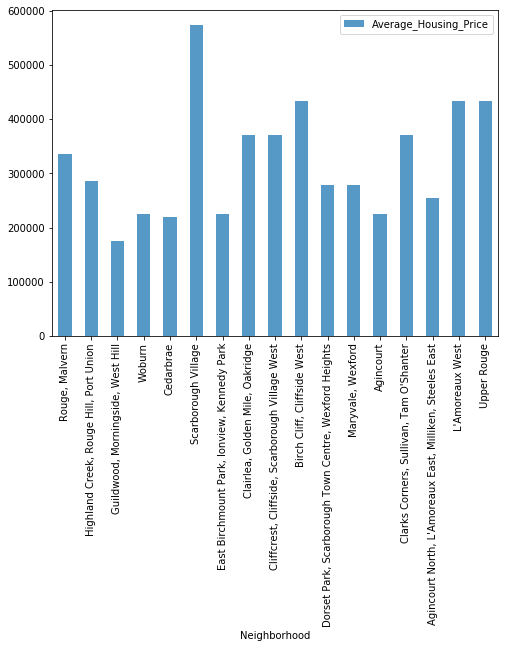

In [26]:
Scarborough_Avg_HousingPrice.set_index('Neighborhood',inplace=True,drop=True)
Scarborough_Avg_HousingPrice.plot(kind='bar',figsize=(8,6),alpha=0.75)

## School Rating by Clusters

In [27]:
clusters=pd.DataFrame({"Cluster1":df1["Neighborhood"],
                      "Cluster2":df2["Neighborhood"],
                      "Cluster3":df3["Neighborhood"]})
clusters = clusters.replace(np.nan, '', regex=True)

KeyError: 'Neighborhood'

In [28]:
new_Scarborough=Scarborough_merged.set_index("Neighborhood",drop=True)
#Source:https://www.greatschools.org
Scarborough_school_ratings=pd.DataFrame({"Neighborhood":df["Neighborhood"],
                                      "Top School Rating":[7,9,5,8,10,10,7,10,1,2,1,2,7,2,3,2,6,]})

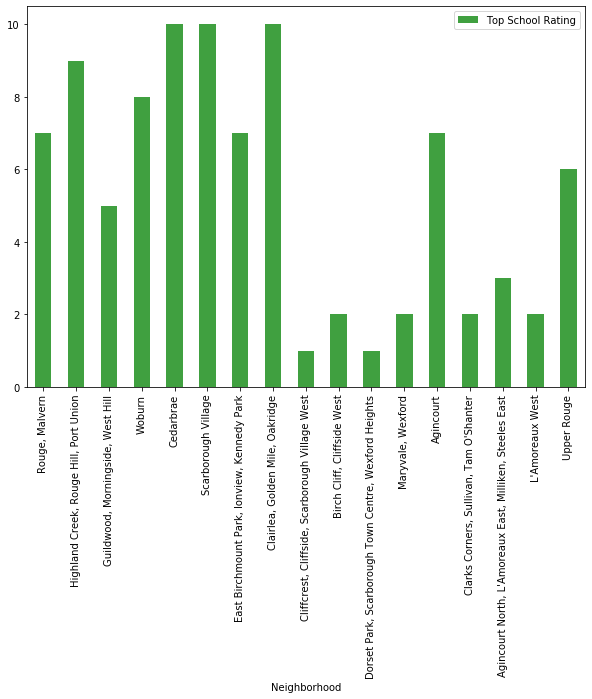

In [29]:
Scarborough_school_ratings.set_index('Neighborhood',inplace=True,drop=True)

Scarborough_school_ratings.plot(kind='bar',figsize=(10,7),color='green',alpha=0.75);